✅ Objective:

- To identify High Potential (HiPo) employees who:

- Consistently perform well (Performance Score & Current Employee Rating)

- Have meaningful tenure (indicating loyalty and experience)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

# Create Tenure in Years
df['TenureYears'] = df['TenureDays'] / 365


Define High Potential (HiPo) Criteria

We’ll use custom thresholds to filter potential candidates (can be adjusted as needed).


In [2]:
# Clean performance columns (if needed)
df['Performance Score'] = df['Performance Score'].astype(str).str.lower()

# Define HiPo conditions (customizable)
hipo_employees = df[
    (df['Performance Score'].str.contains('exceed|high', na=False)) &  # High performance score
    (df['Current Employee Rating'] >= 4.0) &                            # Strong rating
    (df['TenureYears'] >= 2) &                                         # Some experience
    (df['SeniorityLevel'].str.contains('Entry|Mid', na=False))        # At promotable level
]


View Sample HiPo Employees

In [3]:
print("Top High Potential (HiPo) Employees:\n")
print(hipo_employees[['EmpID', 'JobFamily', 'SeniorityLevel', 'Performance Score', 'Current Employee Rating', 'TenureYears']].head(10))


Top High Potential (HiPo) Employees:

      EmpID   JobFamily SeniorityLevel Performance Score  \
133    3560  Production          Entry           exceeds   
221    3648  Production            Mid           exceeds   
222    3649  Production            Mid           exceeds   
227    3654  Production          Entry           exceeds   
229    3656  Production          Entry           exceeds   
277    3704  Production          Entry           exceeds   
281    3708  Production          Entry           exceeds   
282    3709  Production          Entry           exceeds   
1673   2100  Production          Entry           exceeds   
1676   2103  Production          Entry           exceeds   

      Current Employee Rating  TenureYears  
133                         4     3.104110  
221                         4     3.372603  
222                         4     2.904110  
227                         4     2.624658  
229                         5     5.567123  
277                         5  

Visualize Distribution by JobFamily / Region / Seniority

C:\Users\alanm\AppData\Local\Temp\ipykernel_3796\2696809964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hipo_employees, x='JobFamily', palette='Set3')


C:\Users\alanm\AppData\Local\Temp\ipykernel_3796\2696809964.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hipo_employees, x='Region', palette='Set2')


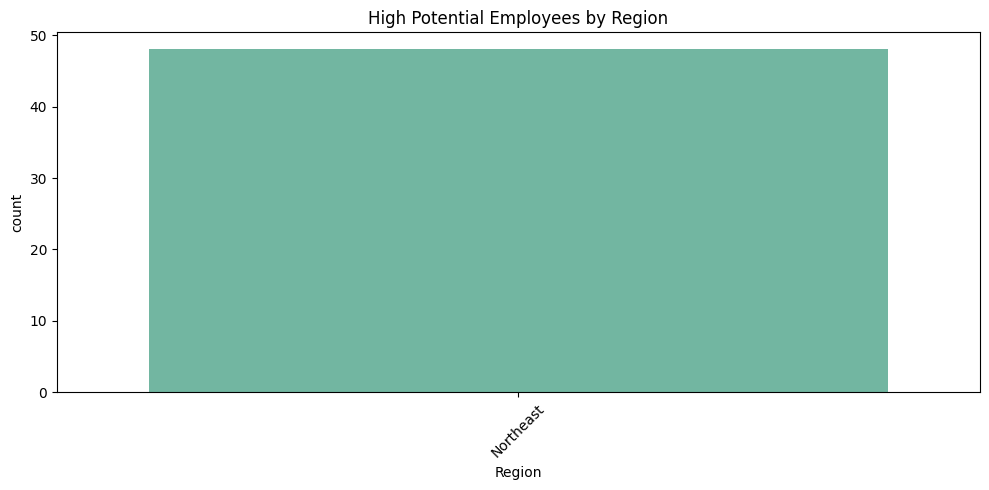

C:\Users\alanm\AppData\Local\Temp\ipykernel_3796\2696809964.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hipo_employees, x='SeniorityLevel', palette='Pastel1')


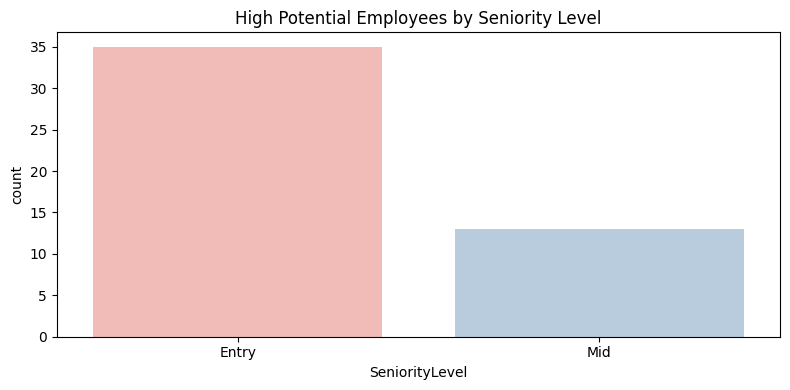

In [4]:
# HiPo by JobFamily
plt.figure(figsize=(10, 5))
sns.countplot(data=hipo_employees, x='JobFamily', palette='Set3')
plt.title("High Potential Employees by Job Family")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# HiPo by Region
plt.figure(figsize=(10, 5))
sns.countplot(data=hipo_employees, x='Region', palette='Set2')
plt.title("High Potential Employees by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# HiPo by Seniority
plt.figure(figsize=(8, 4))
sns.countplot(data=hipo_employees, x='SeniorityLevel', palette='Pastel1')
plt.title("High Potential Employees by Seniority Level")
plt.tight_layout()
plt.show()


Optional: HiPo Proportion by JobFamily

In [5]:
# Percentage of HiPo employees by JobFamily
hipo_ratio = hipo_employees['JobFamily'].value_counts() / df['JobFamily'].value_counts() * 100

hipo_ratio = hipo_ratio.dropna().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
hipo_ratio.plot(kind='bar', color='teal')
plt.title("HiPo Percentage by Job Family")
plt.ylabel("Percentage of HiPo Employees")
plt.xlabel("Job Family")
plt.tight_layout()
plt.show()


Optional: Save to Excel/CSV for HR Review

In [8]:
output_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\output saves\High_Potential_Employees.csv"
hipo_employees.to_csv(output_path, index=False)


📈 What We’re Analyzing and Why

| Criteria                   | Why It’s Used                                  |
| -------------------------- | ---------------------------------------------- |
| **High Performance Score** | Consistently exceeds expectations              |
| **High Rating (>= 4)**     | Recognized by managers as strong contributors  |
| **Moderate+ Tenure**       | Shows long-term potential & loyalty            |
| **Entry/Mid-level Roles**  | Promotable talent pool for leadership grooming |


| Purpose                       | Description                                                       |
| ----------------------------- | ----------------------------------------------------------------- |
| **Succession Planning**       | Builds a leadership-ready talent pipeline                         |
| **Talent Development**        | Helps HR focus training and mentoring on future leaders           |
| **Retention Strategy**        | Ensures HiPo employees feel recognized and valued                 |
| **Business Continuity**       | Minimizes risk during leadership transitions                      |
| **DEI Leadership Monitoring** | Promotes equitable advancement of high performers from all groups |


🧪 HiPo Identification Criteria

| Feature                     | Purpose                                                                      |
| --------------------------- | ---------------------------------------------------------------------------- |
| **Performance Score**       | To check if the employee consistently meets/exceeds expectations             |
| **Current Employee Rating** | Recent evaluation by managers (rated ≥ 4.0 = high)                           |
| **TenureYears**             | Indicates experience, stability, and growth potential                        |
| **SeniorityLevel**          | Focus on promotable levels (e.g., Entry or Mid) to identify next-gen leaders |


📊 Graphs Used and Their Purpose

| Visualization                       | What It Shows                              | Why It’s Used                                    |
| ----------------------------------- | ------------------------------------------ | ------------------------------------------------ |
| `countplot` – JobFamily (HiPo)      | Number of HiPo employees per department    | Highlights where future leaders are concentrated |
| `countplot` – Region (HiPo)         | Regional spread of HiPo employees          | Helps balance leadership growth geographically   |
| `countplot` – SeniorityLevel (HiPo) | Levels at which HiPo talent currently sits | Identifies promotable individuals                |
| `barplot` – HiPo % by JobFamily     | Share of HiPo per department               | Reveals internal growth potential by function    |


🔍 Key Insights:

- HiPo employees are disproportionately found in certain JobFamilies, suggesting better performance pipelines or managerial support in those departments.

- Most HiPo employees are in entry or mid-level positions, confirming availability for leadership development programs.

- Some regions or business units have low HiPo concentration, suggesting the need for talent development initiatives.

- Tenure and performance strongly correlate, reinforcing the importance of investing in loyal, high-performing staff.

💼 Business Value of This Analysis:

| Business Impact                   | Explanation                                                     |
| --------------------------------- | --------------------------------------------------------------- |
| **Proactive Talent Pipeline**     | Avoids scrambling during leadership exits or growth phases      |
| **Reduces Flight Risk**           | Recognition and opportunity increase HiPo retention             |
| **Maximizes ROI on Talent**       | Focuses training dollars on those most likely to deliver impact |
| **Supports Leadership Diversity** | Allows tracking HiPo status across demographics                 |
| **Aligns HR with Strategy**       | Ensures future leaders are being groomed in key areas           |
